### Import Libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data 

In [2]:
df = pd.read_csv(r'C:\Users\riyap\Downloads\datasets for you\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5386,6143-JQKEA,Male,0,No,No,10,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),45.80,436.2,No
2275,7180-PISOG,Male,0,Yes,Yes,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.50,74.5,Yes
2368,6650-BWFRT,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.5,No
5640,5393-RXQSZ,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,79.60,79.6,Yes
6908,1750-CSKKM,Male,0,No,Yes,9,Yes,No,DSL,No,...,No,No,Yes,No,Month-to-month,No,Electronic check,55.35,449.75,Yes


### Preprocessing

In [3]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [7]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\riyap\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
df1.TotalCharges.values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [9]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### Visualization

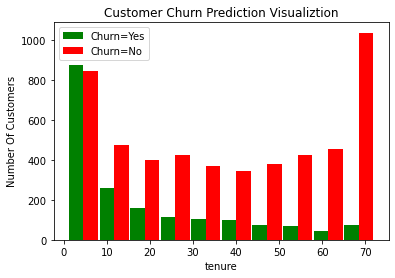

In [10]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

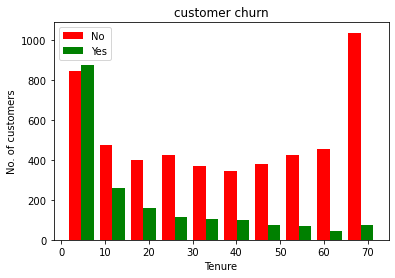

In [11]:
tenure_no = df1[df1['Churn']=='No'].tenure
tenure_no
tenure_yes = df1[df1['Churn']=='Yes'].tenure
plt.xlabel('Tenure')
plt.ylabel('No. of customers')
plt.title('customer churn')
plt.hist([tenure_no, tenure_yes], color=['red', 'green'], label=['No', 'Yes'])
plt.legend()

### Operations

In [12]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [13]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\riyap\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [14]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\riyap\anaconda3\envs\tf-gpu\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [16]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [17]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [18]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [42]:
x= df2.drop('Churn', axis= 1)
y = df2['Churn']
#from sklearn.preprocessing import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10, stratify=y)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((5625, 26), (5625,), (1407, 26), (1407,))

In [44]:
ytrain.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

### Model Building

In [45]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds
ypreds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4778 - accuracy: 0.7644
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4229 - accuracy: 0.7996
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4169 - accuracy: 0.8032
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4146 - accuracy: 0.8043
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4130 - accuracy: 0.8046
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4106 - accuracy: 0.8037
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4097 - accuracy: 0.8050
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4071 - accuracy: 0.8089
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4059 - accuracy: 0.8082
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4047 - accura

176/176 [==============================] - 1s 4ms/step - loss: 0.3513 - accuracy: 0.8320
Epoch 82/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3519 - accuracy: 0.8316
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3522 - accuracy: 0.8338
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3521 - accuracy: 0.8327
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3509 - accuracy: 0.8315
Epoch 86/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3500 - accuracy: 0.8336
Epoch 87/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3500 - accuracy: 0.8327
Epoch 88/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3490 - accuracy: 0.8324
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3493 - accuracy: 0.8340
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3493 - accuracy: 

In [46]:
count0, count1 = df['Churn'].value_counts()
count0, count1

(5174, 1869)

In [50]:
dfclass0 = df2[df2.Churn==0]
dfclass1 = df2[df2.Churn==1]
dfclass0, dfclass1

(      gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
 0          1              0        1           0  0.000000             0   
 1          0              0        0           0  0.464789             1   
 3          0              0        0           0  0.619718             0   
 6          0              0        0           1  0.295775             1   
 7          1              0        0           0  0.126761             0   
 ...      ...            ...      ...         ...       ...           ...   
 7037       1              0        0           0  1.000000             1   
 7038       0              0        1           1  0.323944             1   
 7039       1              0        1           1  1.000000             1   
 7040       1              0        1           1  0.140845             0   
 7042       0              0        0           0  0.915493             1   
 
       MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ... 

In [53]:
df_under = dfclass0.sample(count1)
df_under
df_test_under = pd.concat([df_under, dfclass1], axis = 0)
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [55]:
x = df_test_under.drop('Churn', axis =1)
y = df_test_under.Churn
x,y
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=10, stratify=y)

In [56]:
ytrain.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

### Model testing

In [57]:
ypreds = ANN(xtrain, ytrain, xtest, ytest, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6049 - accuracy: 0.6676
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5071 - accuracy: 0.7559
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4920 - accuracy: 0.7622
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4865 - accuracy: 0.7639
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4834 - accuracy: 0.7642
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4790 - accuracy: 0.7696
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.7706
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4753 - accuracy: 0.7716
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4718 - accuracy: 0.7766
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4706 - accuracy: 0.7749
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.3899 - accuracy: 0.8201
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3875 - accuracy: 0.8244
Epoch 85/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3901 - accuracy: 0.8184
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3889 - accuracy: 0.8237
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3867 - accuracy: 0.8231
Epoch 88/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8237
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3876 - accuracy: 0.8234
Epoch 90/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.8244
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.3840 - accuracy: 0.8254
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.3853 - accuracy: 0.8241
Epoch 93/100
